# ML Models


1.   Linear Regression
2.   Random Forest
3.   Logistic Regression

etc





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
print(torch.__version__)

2.5.1+cu121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Datasets/US_Regional_Sales_Data.csv /content/sample_data/US_Regional_Sales_Data.csv

In [ ]:
dataset = pd.read_csv('/content/sample_data/US_Regional_Sales_Data.csv')

In [ ]:
dataset.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [ ]:
dataset.shape

(7991, 16)

In [ ]:
# change Unit Cost and Unit Price format
dataset['Unit Cost'] = dataset['Unit Cost'].apply(lambda x: float(x.replace(",","")))
dataset['Unit Price'] = dataset['Unit Price'].apply(lambda x: float(x.replace(",","")))
dataset['Total Price'] = (dataset['Unit Price'] * dataset['Order Quantity']).astype(float)

In [ ]:
dataset.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,1001.18,1963.1,9815.5
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,3348.66,3939.6,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,1775.5,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,1464.69,2324.9,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,1476.14,1822.4,14579.2


# Data Sampling

In [ ]:
df = dataset.sample(n=7680, random_state=42).reset_index()
df

,index,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Total Price
0,6255,SO - 0006356,Online,WARE-NMK1003,10/3/20,10/6/20,18/6/20,25/6/20,USD,19,48,154,7,6,0.100,1244.26,2539.3,15235.8
1,5465,SO - 0005566,Online,WARE-XYS1001,1/12/19,8/3/20,25/3/20,27/3/20,USD,16,1,18,38,8,0.150,142.84,174.2,1393.6
2,6377,SO - 0006478,Distributor,WARE-NMK1003,10/3/20,26/6/20,1/7/20,11/7/20,USD,25,47,155,32,4,0.400,458.68,1092.1,4368.4
3,7609,SO - 0007710,In-Store,WARE-MKL1006,26/9/20,15/11/20,18/11/20,19/11/20,USD,6,9,331,24,5,0.200,1912.98,2304.8,11524.0
4,2653,SO - 0002754,In-Store,WARE-NMK1003,4/2/19,9/4/19,3/5/19,13/5/19,USD,4,49,100,15,1,0.400,5033.64,6371.7,6371.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,3397,SO - 0003498,Online,WARE-PUJ1005,15/5/19,3/7/19,11/7/19,15/7/19,USD,17,38,326,12,5,0.075,498.88,978.2,4891.0
7676,4282,SO - 0004383,In-Store,WARE-XYS1001,23/8/19,22/10/19,18/11/19,25/11/19,USD,2,11,54,14,6,0.200,2003.57,3577.8,21466.8
7677,1147,SO - 0001248,In-Store,WARE-UHY1004,19/7/18,15/10/18,6/11/18,10/11/18,USD,12,38,229,1,5,0.150,1254.24,1929.6,9648.0
7678,3272,SO - 0003373,Online,WARE-MKL1006,4/2/19,18/6/19,20/6/19,26/6/19,USD,13,41,352,13,3,0.200,4095.31,5534.2,16602.6


# EDA

In [ ]:
dataset.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'Total Price'],
      dtype='object')

In [ ]:
# Change column name
dataset.rename(columns={'Sales Channel':'SalesChannel',
                   'Order Quantity':'Quantify',
                   'Discount Applied':'Discount',
                   'Unit Cost':'UnitCost',
                   'Unit Price':'UnitPrice',
                        'Total Price':'TotalPrice'}, inplace=True)

In [ ]:
dataset.columns

Index(['OrderNumber', 'SalesChannel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Quantify', 'Discount',
       'UnitCost', 'UnitPrice', 'TotalPrice'],
      dtype='object')

<Axes: xlabel='SalesChannel', ylabel='Count'>

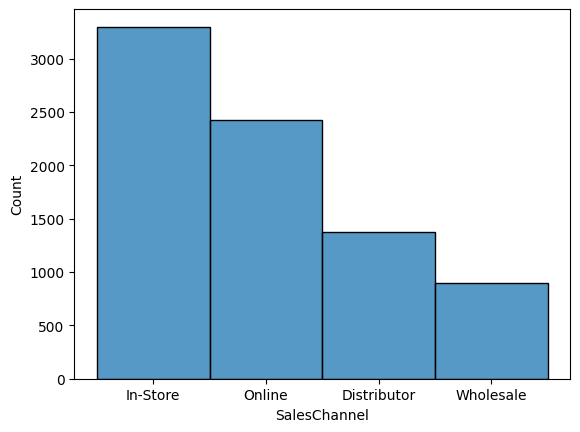

In [ ]:
sns.histplot(dataset['SalesChannel'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'WARE-UHY1004'),
  Text(1, 0, 'WARE-NMK1003'),
  Text(2, 0, 'WARE-PUJ1005'),
  Text(3, 0, 'WARE-XYS1001'),
  Text(4, 0, 'WARE-MKL1006'),
  Text(5, 0, 'WARE-NBV1002')])

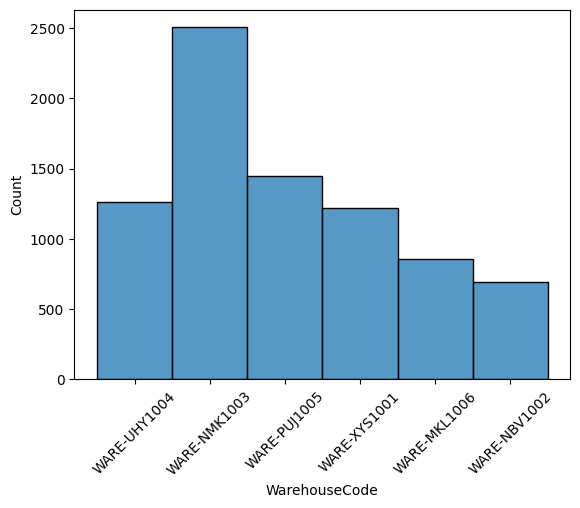

In [ ]:
sns.histplot(dataset['WarehouseCode'])
plt.xticks(rotation=45)

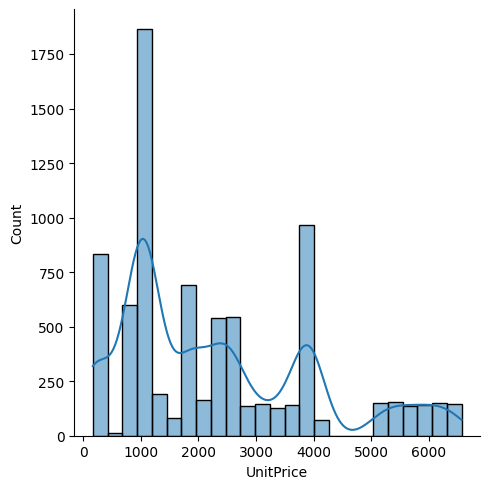

In [ ]:
sns.displot(dataset['UnitPrice'], kde=True)

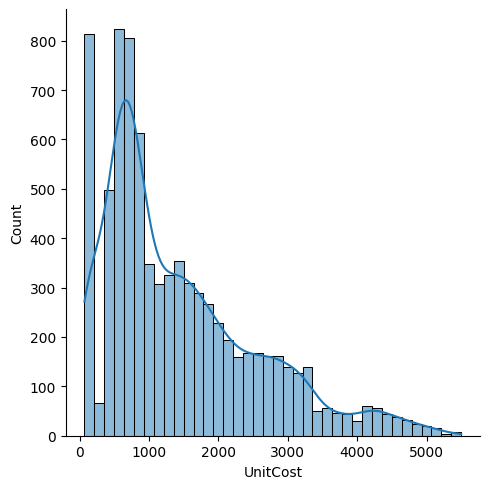

In [ ]:
sns.displot(dataset['UnitCost'], kde=True)

<Axes: >

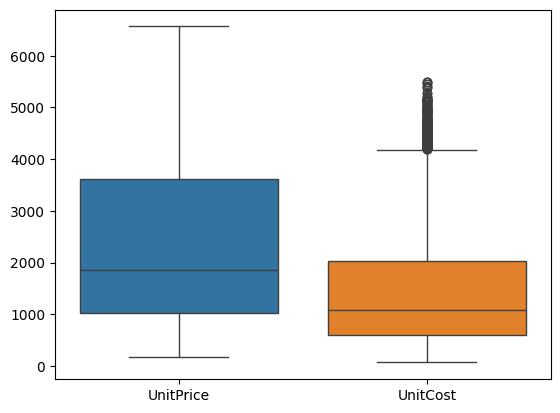

In [ ]:
sns.boxplot(dataset[['UnitPrice','UnitCost']])

<Axes: >

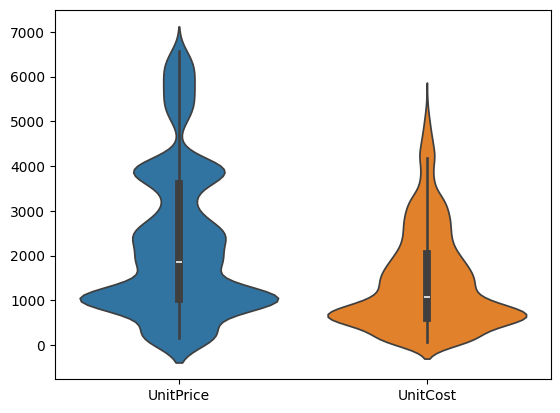

In [ ]:
sns.violinplot(dataset[['UnitPrice','UnitCost']])

<Axes: xlabel='SalesChannel', ylabel='UnitPrice'>

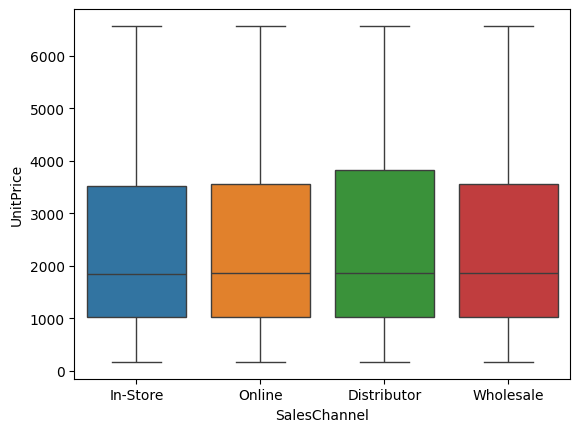

In [ ]:
# data distribtion of Unit Price using Seles Channel
sns.boxplot(x='SalesChannel', y='UnitPrice', data=dataset, hue='SalesChannel')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'WARE-UHY1004'),
  Text(1, 0, 'WARE-NMK1003'),
  Text(2, 0, 'WARE-PUJ1005'),
  Text(3, 0, 'WARE-XYS1001'),
  Text(4, 0, 'WARE-MKL1006'),
  Text(5, 0, 'WARE-NBV1002')])

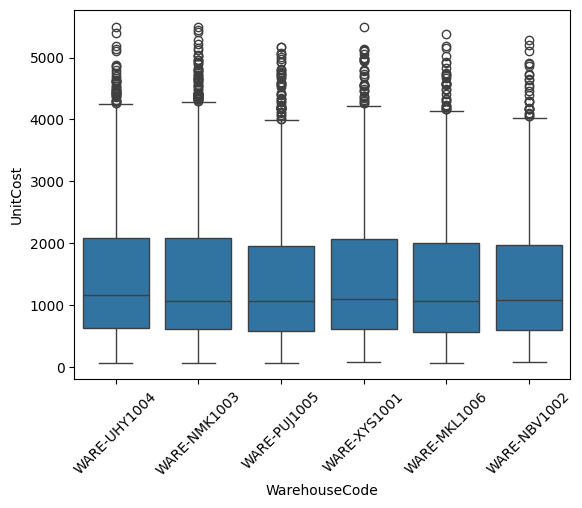

In [ ]:
sns.boxplot(data=dataset, x='WarehouseCode', y='UnitCost')
plt.xticks(rotation=45)

<Axes: xlabel='SalesChannel', ylabel='Discount'>

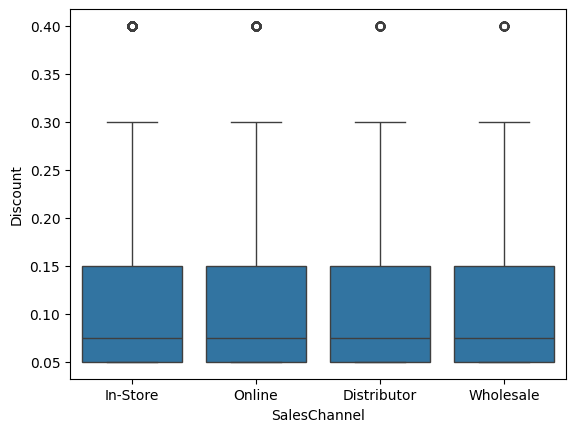

In [ ]:
sns.boxplot(data=dataset, x='SalesChannel', y='Discount')

<Axes: xlabel='SalesChannel', ylabel='Quantify'>

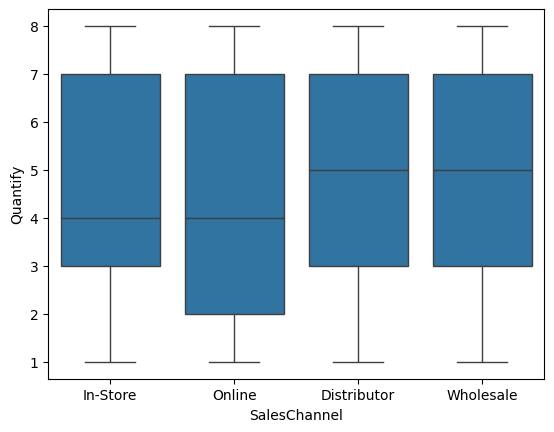

In [ ]:
sns.boxplot(data=dataset, x='SalesChannel', y='Quantify')

<Axes: xlabel='UnitPrice', ylabel='UnitCost'>

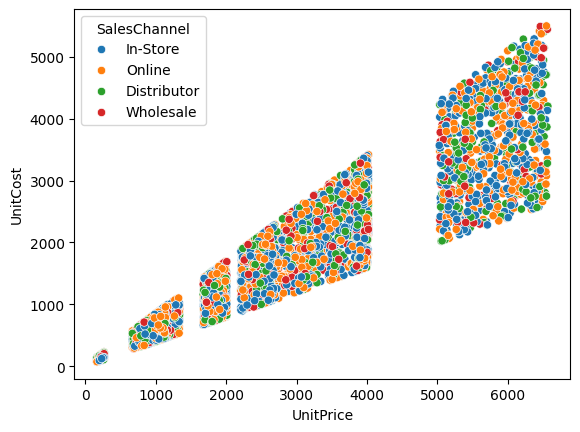

In [ ]:
sns.scatterplot(data=dataset, x='UnitPrice', y='UnitCost',hue='SalesChannel')

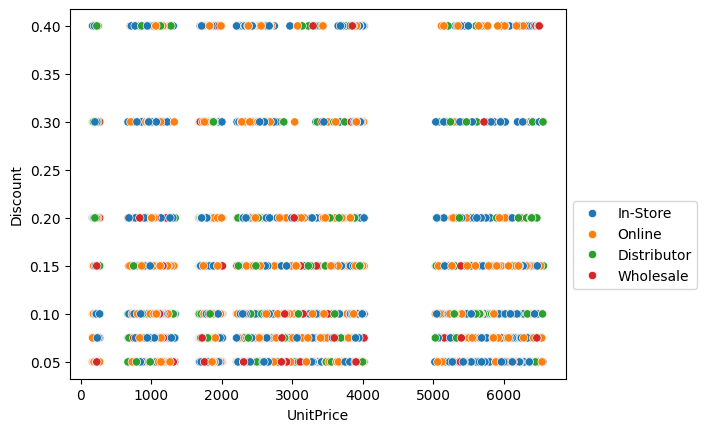

In [ ]:
sns.scatterplot(data=dataset, x='UnitPrice', y='Discount',hue='SalesChannel')
plt.legend(bbox_to_anchor=(1.0, 0.5))

In [ ]:
# remove the outlier from Unit Cost

# calculate the lower and upper bound using IQR formula

Q1 = dataset['UnitCost'].quantile(0.25)
Q3 = dataset['UnitCost'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# apply triming procedure to filteredout the acural data
filtered_dataset = dataset[dataset['UnitCost'].between(lower_bound, upper_bound, inclusive='both')]

print(f"Filtered dataset size: {filtered_dataset.shape}")
print(f"Actual dataset size: {dataset.shape}")

Filtered dataset size: (7508, 17)
Actual dataset size: (7991, 17)


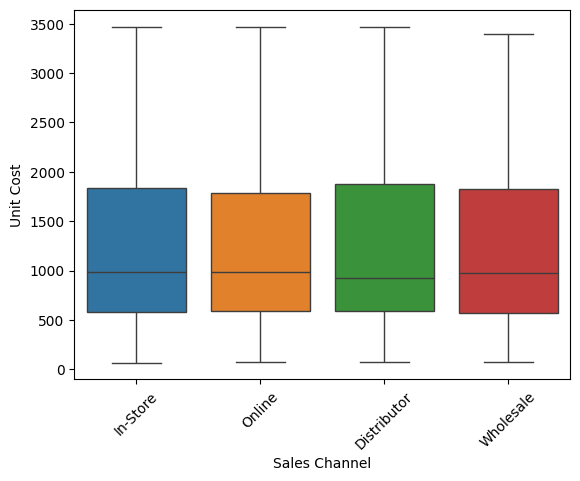

In [ ]:
sns.boxplot(data=filtered_dataset, x='SalesChannel', y='UnitCost', hue='SalesChannel')
plt.xticks(rotation=45)
plt.xlabel('Sales Channel')
plt.ylabel('Unit Cost')
plt.show()

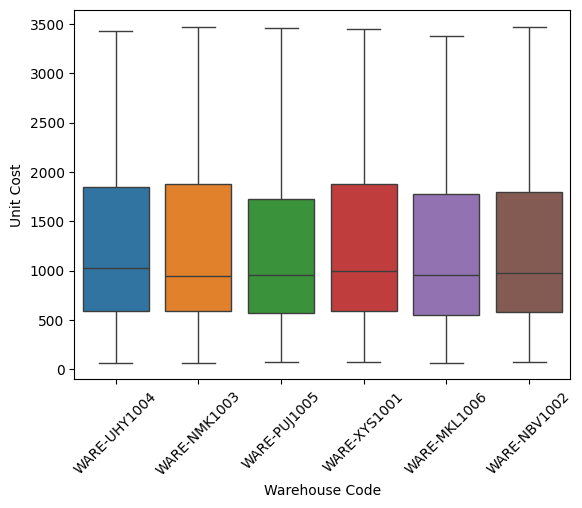

In [ ]:
sns.boxplot(data=filtered_dataset, x='WarehouseCode', y='UnitCost', hue='WarehouseCode')
plt.xticks(rotation=45)
plt.xlabel('Warehouse Code')
plt.ylabel('Unit Cost')
plt.show()

<Axes: xlabel='UnitPrice', ylabel='UnitCost'>

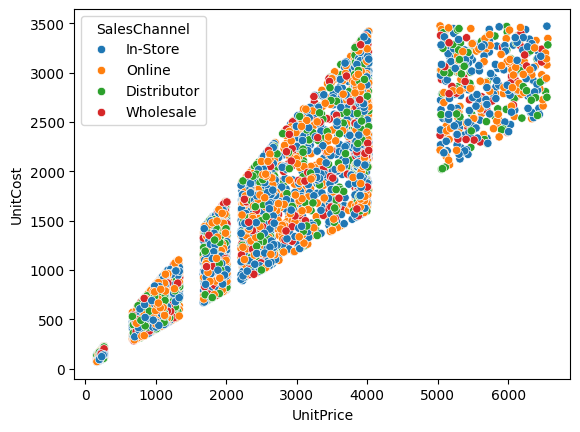

In [ ]:
sns.scatterplot(data=filtered_dataset, x='UnitPrice', y='UnitCost',hue='SalesChannel')

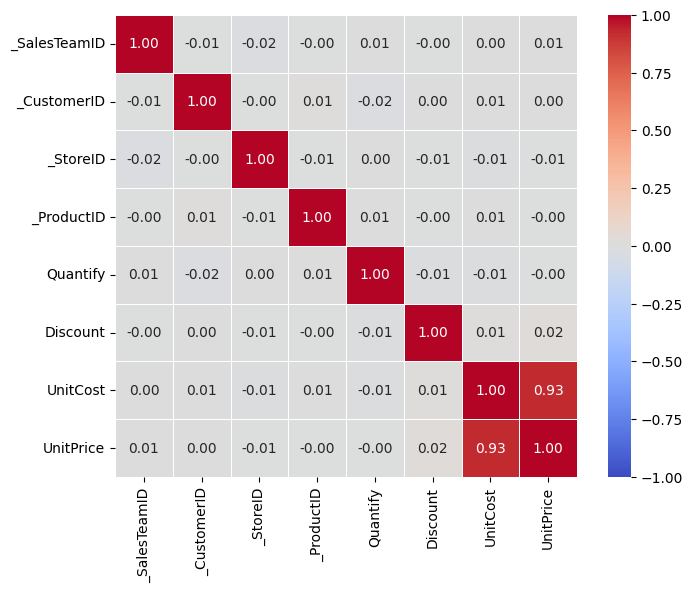

In [ ]:
plt.figure(figsize=(8, 6))
data_for_heatmap = filtered_dataset[['_SalesTeamID','_CustomerID','_StoreID','_ProductID','Quantify','Discount','UnitCost','UnitPrice']].copy()
data_corr = data_for_heatmap.corr()
sns.heatmap(data_corr, cmap = 'coolwarm',vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

# Add labels and title
# plt.title("Heatmap Example with Seaborn", fontsize=16)
# plt.xlabel("X-axis", fontsize=14)
# plt.ylabel("Y-axis", fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Now apply the ANOVA test to choose the features of this dataset
# before appying the ANOVA test, we need to convert categorical data into numerical
# because ANOVA test is appropriate only for numerical data

# let's consider 'Sales Channel', 'WarehouseCode' columns, both have categorical information
# to convert from categorical data to numerical, we need to follow any one of the following:
#1. One-Hot Encoding
#2. Label Encoding
#3. Ordinal Encoding

# let's consider Label Encoding process:

dataset_new = filtered_dataset.copy()

labelEncoder = LabelEncoder()
dataset_new.loc[:, '_SalesChannel'] = labelEncoder.fit_transform(dataset_new['SalesChannel'].values)
dataset_new.loc[:, '_WarehouseCode'] = labelEncoder.fit_transform(dataset_new['WarehouseCode'].values)

print(f"dataset size: {dataset_new.shape}")

dataset size: (7508, 19)


In [ ]:
dataset_new.columns

Index(['OrderNumber', 'SalesChannel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Quantify', 'Discount',
       'UnitCost', 'UnitPrice', 'TotalPrice', '_SalesChannel',
       '_WarehouseCode'],
      dtype='object')

In [ ]:
# apply the ANOVA test
ols_model = ols('UnitPrice ~ UnitCost+Discount+Quantify+SalesChannel+WarehouseCode', data=dataset_new).fit()
anova_table = sm.stats.anova_lm(ols_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
SalesChannel,1.306438e+05,3.0,0.150941,0.929124
WarehouseCode,1.668930e+06,5.0,1.156928,0.327852
UnitCost,1.347670e+10,1.0,46711.291929,0.000000
Discount,2.031280e+05,1.0,0.704057,0.401450
Quantify,2.178446e+05,1.0,0.755066,0.384905
Residual,2.162675e+09,7496.0,NaN,NaN


In [ ]:
ols_model.t_test_pairwise('SalesChannel').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
In-Store-Distributor,-10.659658,17.835236,-0.597674,0.550075,-45.621723,24.302407,0.991705,False
Online-Distributor,-8.559015,18.756815,-0.456315,0.648177,-45.327634,28.209603,0.994610,False
Wholesale-Distributor,-1.985630,23.830468,-0.083323,0.933597,-48.700032,44.728773,0.994610,False
Online-In-Store,2.100643,14.819114,0.141752,0.887280,-26.948977,31.150263,0.994610,False
Wholesale-In-Store,8.674028,20.876856,0.415485,0.677799,-32.250466,49.598522,0.994610,False
Wholesale-Online,6.573385,21.665725,0.303400,0.761593,-35.897512,49.044283,0.994610,False


In [ ]:
# as we saw from the above ANOVA test, only UnitCost has a significate effect on
# respect to our target variable. So that the next phase, we will select only independent
# variable as UnitCost and dependent variable is UnitPrice.

# Split Data

In [ ]:
# extract target and feature data

y = dataset_new['UnitPrice'].astype(float)
X = dataset_new['UnitCost'].astype(float)

# Make Dataset

In [ ]:
class DataSplit:
  def __init__(self, X, y, validation_size, test_size, random_state):
    self.X = X
    self.y = y
    self.val_size = validation_size
    self.test_size = test_size
    self.randon_state = random_state

  def splitData(self):
    X_train, X_val, y_train, y_val = train_test_split(self.X, self.y, test_size=self.val_size, random_state=self.randon_state)
    X_valid, X_test, y_valid, y_test = train_test_split(X_val, y_val, test_size=self.test_size, random_state=self.randon_state)


    X_train_tensor = self.convertToTensor(self.normalization(X_train.values)).unsqueeze(1)
    X_valid_tensor = self.convertToTensor(self.normalization(X_valid.values)).unsqueeze(1)
    X_test_tensor = self.convertToTensor(self.normalization(X_test.values)).unsqueeze(1)
    y_train_tensor = self.convertToTensor(self.normalization(y_train.values))
    y_valid_tensor = self.convertToTensor(self.normalization(y_valid.values))
    y_test_tensor = self.convertToTensor(self.normalization(y_test.values))

    print(f"Train shape: {X_train_tensor.shape}")
    print(f"Validation Shape: {X_valid_tensor.shape}")
    print(f"Test shape: {X_test_tensor.shape}")


    return X_train_tensor,X_valid_tensor, X_test_tensor, y_train_tensor,y_valid_tensor, y_test_tensor

  def normalization(self, data):
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

  def convertToTensor(self, data):
    tensor_data = torch.tensor(data, dtype=torch.float32)
    return tensor_data

In [ ]:
datasplit = DataSplit(X=X, y=y,validation_size=0.2, test_size=0.1, random_state=42)

# split dataset into train, val and test with 20% ratio

x_train, x_val, x_test, y_train, y_val, y_test = datasplit.splitData()

Train shape: torch.Size([6006, 1])
Validation Shape: torch.Size([1351, 1])
Test shape: torch.Size([151, 1])


In [ ]:
x_train[:5],x_val[:5],x_test[:5]

(tensor([[-0.7311],
         [-0.5665],
         [-1.2287],
         [-1.2703],
         [-0.9956]]),
 tensor([[-1.2771],
         [-0.7593],
         [-0.6174],
         [-0.6617],
         [ 0.0064]]),
 tensor([[-0.8531],
         [ 1.0833],
         [-0.9461],
         [ 0.7150],
         [-0.3463]]))

# Build LinearRegression Model

In [103]:
torch.manual_seed(42)

learning_rate = 0.1
dropout = 0.2

In [ ]:
# Device Information
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"
device

'cpu'

In [ ]:
class PricePredictionRegression(nn.Module):
  def __init__(self, input_feature: int, output_feature: int):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=input_feature, out_features=output_feature)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.layer_1(x)
    return x

model_0 = PricePredictionRegression(input_feature=x_train.shape[1], output_feature=1)
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.2343]])),
             ('layer_1.bias', tensor([0.9186]))])

In [104]:
# add loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)

In [ ]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [105]:
# train and test loop

# define epoch
epochs = 2000

for epoch in range(epochs):
  ### Training
  model_0.train()

  # forward pass
  train_pred = model_0(x_train).squeeze()

  # calculate train_loss
  train_loss = loss_fn(train_pred, y_train)
  #calculate train accuracy
  train_accuracy = accuracy_fn(y_pred=train_pred, y_true=y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_val).squeeze()

    # calcualte test loss
    test_loss = loss_fn(test_pred, y_val)
    # calculate test accuracy
    test_accuracy = accuracy_fn(y_pred=test_pred, y_true=y_val)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Train Accuracy: {train_accuracy} | Valid Loss: {test_loss} | Valid Accuracy: {test_accuracy}")




Epoch: 0 | Train Loss: 1.3526489734649658 | Train Accuracy: 0.0 | Valid Loss: 1.2770487070083618 | Valid Accuracy: 0.0
Epoch: 100 | Train Loss: 0.2603982090950012 | Train Accuracy: 0.0 | Valid Loss: 0.2592439651489258 | Valid Accuracy: 0.0
Epoch: 200 | Train Loss: 0.2603982388973236 | Train Accuracy: 0.0 | Valid Loss: 0.2592439651489258 | Valid Accuracy: 0.0
Epoch: 300 | Train Loss: 0.2603982090950012 | Train Accuracy: 0.0 | Valid Loss: 0.25924399495124817 | Valid Accuracy: 0.0
Epoch: 400 | Train Loss: 0.2603982388973236 | Train Accuracy: 0.0 | Valid Loss: 0.25924378633499146 | Valid Accuracy: 0.0
Epoch: 500 | Train Loss: 0.2603982388973236 | Train Accuracy: 0.0 | Valid Loss: 0.25924384593963623 | Valid Accuracy: 0.0
Epoch: 600 | Train Loss: 0.2603982388973236 | Train Accuracy: 0.0 | Valid Loss: 0.259243905544281 | Valid Accuracy: 0.0
Epoch: 700 | Train Loss: 0.2603982388973236 | Train Accuracy: 0.0 | Valid Loss: 0.2592436969280243 | Valid Accuracy: 0.0
Epoch: 800 | Train Loss: 0.26039

In [ ]:
x_test[:5], y_test[:5]

# x=z×σ+μ
z = y_test[0]


(tensor([[-0.8531],
         [ 1.0833],
         [-0.9461],
         [ 0.7150],
         [-0.3463]]),
 tensor([-0.7740,  1.3135, -0.7368,  0.3698,  0.1466]))

<Axes: xlabel='None', ylabel='None'>

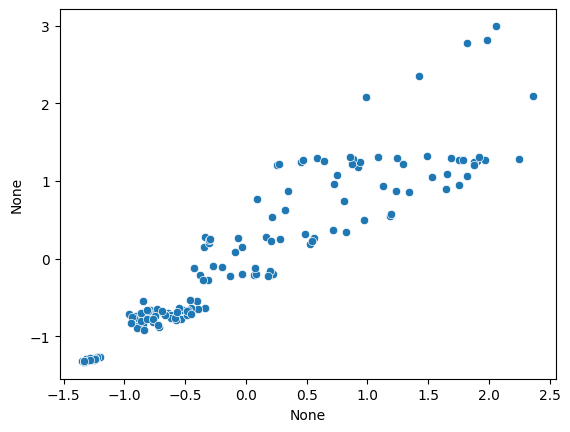

In [ ]:
sns.scatterplot(x=x_test.squeeze(), y=y_test)

In [106]:
# predict

model_0.eval()
with torch.inference_mode():
  test_pred = model_0(x_test).squeeze()
print(test_pred[:5])
print(y_test[:5])

tensor([-0.8523,  0.9080, -0.9369,  0.5731, -0.3916])
tensor([-0.7740,  1.3135, -0.7368,  0.3698,  0.1466])


<Axes: xlabel='None', ylabel='None'>

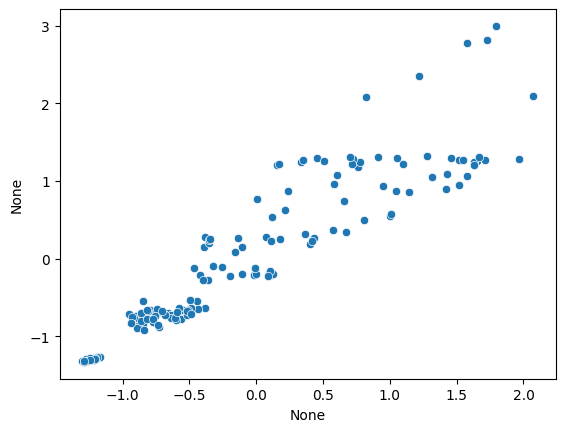

In [107]:
sns.scatterplot(x=test_pred, y=y_test)